## Market Quotes

In [17]:
!pip install utils
%matplotlib inline
import numpy as np
import utils

from QuantLib import *

Defaulting to user installation because normal site-packages is not writeable


In [18]:
today = Date(17, October, 2024)
Settings.instance().evaluationDate = today

## Setting the stage

For illustration purposes, I’ll create a bond curve using the same data and algorithm shown in one
of the QuantLib C++ examples; namely, I’ll give to the curve the functional form defined by the
Nelson-Siegel model and I’ll fit it to a number of bond. Here are the maturities in years and the
coupons of the bonds I’ll use:

In [19]:
data = [
    (2, 0.02), (4, 0.0225), (6, 0.025), (8, 0.0275),
    (10, 0.03), (12, 0.0325), (14, 0.035), (16, 0.0375),
    (18, 0.04), (20, 0.0425), (22, 0.045), (24, 0.0475),
    (26, 0.05), (28, 0.0525), (30, 0.055)
]


 For simplicity, I’ll use the same start date, frequency and conventions for all the bonds; this doesn’t

 affect the point I’m going to make in the rest of the notebook. I’ll also assume that all bonds currently

price at 100. I’ll skip over the details of building the curve now; the one thing you’ll need to remember is that it depends on the quotes modeling the bond prices.


In [20]:
calendar = TARGET()
settlement = calendar.advance(today, 3, Days)
quotes = []
helpers = []
for length, coupon in data:
    maturity = calendar.advance(settlement, length, Years)
    schedule = Schedule(settlement, maturity, Period(Annual),
                        calendar, ModifiedFollowing, ModifiedFollowing,
                        DateGeneration.Backward, False)
    quote = SimpleQuote(100.0)
    quotes.append(quote)
    helpers.append(FixedRateBondHelper(QuoteHandle(quote), 3, 100.0,
                                       schedule, [coupon], SimpleDayCounter(),
                                       ModifiedFollowing))
    curve = FittedBondDiscountCurve(0, calendar, helpers,
                                    SimpleDayCounter(), NelsonSiegelFitting())

Here is a visualization of the curve as discount factors versus time in years:

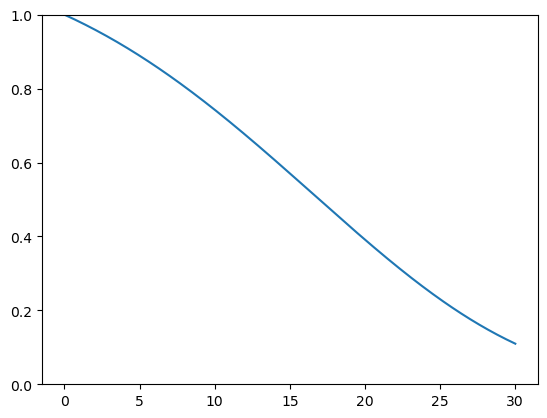

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code) ...

sample_times = np.linspace(0.0, 30.0, 301)
sample_discounts = [ curve.discount(t) for t in sample_times ]

f, ax = plt.subplots() # Changed utils.plot() to plt.subplots()
ax.set_ylim(0.0, 1.0)
ax.plot(sample_times, sample_discounts);





here’s a bond priced by discounting its coupons on the curve:


In [25]:
schedule = Schedule(today, calendar.advance(today, 15, Years),
                    Period(Semiannual), calendar,
                    ModifiedFollowing, ModifiedFollowing,
                    DateGeneration.Backward, False)
bond = FixedRateBond(3, 100.0, schedule, [0.04], Actual360())
bond.setPricingEngine(DiscountingBondEngine(YieldTermStructureHandle(curve)))
print(bond.cleanPrice()) # Changed bond.cleanprice() to bond.cleanPrice()

105.78275388879618


 “It looked like a good idea at the time”

In [26]:
prices = []
def print_price():
    p = bond.cleanPrice()
    prices.append(p)
    print(p)
o = Observer(print_price)
o.registerWith(bond)

In [27]:
quotes[2].setValue(101.0)

105.78275388879618
105.87404418720271


In [28]:
quotes[2].setValue(100.0)

105.87404418720271
105.7827538800698


In [29]:
prices = []
for q in quotes:
    q.setValue(101.0)

105.7827538800698
105.29040641172901
105.29040641172901
105.22585319424942
105.22585319424942
105.32704783761613
105.32704783761613
105.49541446906068
105.49541446906068
105.68796018156047
105.68796018156047
105.88347950709783
105.88347950709783
106.06972570364204
106.06972570364204
106.23813019062356
106.23813019062356
106.38173152812786
106.38173152812786
106.494549731252
106.494549731252
106.57244946575625
106.57244946575625
106.61315446003351
106.61315446003351
106.61708072511834
106.61708072511834
106.5873327623282
106.5873327623282
106.52794318049007


As you see, each of the updates sent a notification and thus triggered a recalculation. We can use
the list of prices we collected (slicing it to skip duplicate values) to visualize how the price changed

Defaulting to user installation because normal site-packages is not writeable


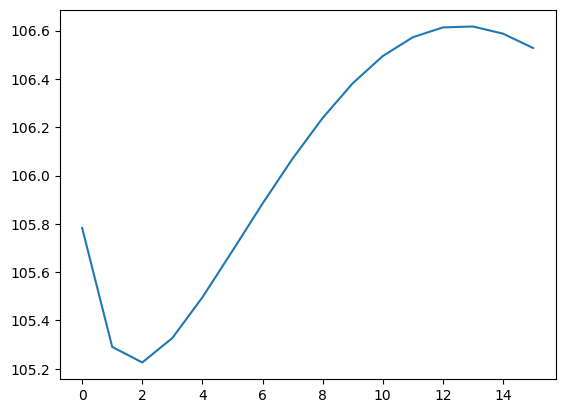

In [36]:
!pip install matplotlib

import matplotlib.pyplot as plt
import utils # Assuming 'utils' is a custom module, it should be placed in the same directory or in a directory on the Python path

unique_prices = prices[::2]+prices[-1::]

# If 'utils' is a custom module intended to contain the plot function:
# Ensure 'utils.py' contains a 'plot' function similar to this:
# def plot():
#    fig, ax = plt.subplots()
#    return fig, ax

# _, ax = utils.plot() # If the function exists in the 'utils' module.
# Alternatively, use matplotlib directly if 'utils' does not have a 'plot' function or is unavailable.
fig, ax = plt.subplots() # Create a figure and axes using matplotlib
ax.plot(unique_prices, '-'); 
plt.show()

## Alternatives?

In [37]:
bond.freeze()

In [38]:
for q in quotes:
    q.setValue(101.5)

In [39]:
bond.unfreeze()

106.86486068956208


In [40]:
del o

In [42]:
flag = {}
flag['status'] = 'down'
def set_flag():
    flag['status'] = 'up'
o = Observer(set_flag)
o.registerWith(bond)

In [43]:
print(flag)

{'status': 'down'}


In [44]:
for q in quotes:
    q.setValue(100.0)

In [45]:
print(flag)

{'status': 'up'}


In [46]:
bond.cleanPrice()

105.78275382133086

In [47]:
del o

In [48]:
for q in quotes:
    q.setValue(101.0)

In [49]:
bond.cleanPrice()

106.52794316262668